<a href="https://colab.research.google.com/github/maren-ha/NORBIS_workshop_differentiable_programming/blob/main/Practical_1_Automatic_differentiation_in_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.7.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.7.1 on the current Colab Runtime...
2022-10-12 16:02:34 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.7/julia-1.7.1-linux-x86_64.tar.gz [123374573/123374573] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.7

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.7.1
Commit ac5cc99908 (2021-12-22 19:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2


# Setup 

Upload the `Project.toml` file from the Github repository. (Click on "Files" in the left menu, then on the upload icon, then select the file). 

The following cell installs all necessary Julia package dependencies as specified in that `Project.toml` file. 

In [2]:
using Pkg;
Pkg.activate(".")
Pkg.instantiate()
Pkg.status()

  Activating project at `/content`
    Updating registry at `~/.julia/registries/General.toml`
   Installed JpegTurbo_jll ──────────────────── v2.1.2+0
   Installed libfdk_aac_jll ─────────────────── v2.0.2+0
   Installed TreeViews ──────────────────────── v0.3.0
   Installed x265_jll ───────────────────────── v3.5.0+0
   Installed Enzyme_jll ─────────────────────── v0.0.42+0
   Installed SIMDDualNumbers ────────────────── v0.1.1
   Installed Calculus ───────────────────────── v0.5.1
   Installed OffsetArrays ───────────────────── v1.12.8
   Installed Libmount_jll ───────────────────── v2.35.0+0
   Installed GR_jll ─────────────────────────── v0.69.1+0
   Installed HypergeometricFunctions ────────── v0.3.11
   Installed LERC_jll ───────────────────────── v3.0.0+1
   Installed StatsFuns ──────────────────────── v1.0.1
   Installed ContextVariablesX ──────────────── v0.1.3
   Installed ShowCases ──────────────────────── v0.1.0
   Installed Accessors ──────────────────────── v0.1.20
   In

      Status `/content/Project.toml`
  [587475ba] Flux v0.13.6
  [1dea7af3] OrdinaryDiffEq v6.28.1
  [91a5bcdd] Plots v1.35.3
  [1ed8b502] SciMLSensitivity v7.10.0
  [2913bbd2] StatsBase v0.33.21
  [e88e6eb3] Zygote v0.6.49


+ RelocatableFolders v1.0.0
  [ae029012] + Requires v1.3.0
  [ae5879a3] + ResettableStacks v1.1.1
  [37e2e3b7] + ReverseDiff v1.14.3
  [79098fc4] + Rmath v0.7.0
  [3cdde19b] + SIMDDualNumbers v0.1.1
  [94e857df] + SIMDTypes v0.1.0
  [476501e8] + SLEEFPirates v0.6.36
  [0bca4576] + SciMLBase v1.61.2
  [1ed8b502] + SciMLSensitivity v7.10.0
  [6c6a2e73] + Scratch v1.1.1
  [efcf1570] + Setfield v1.1.1
  [605ecd9f] + ShowCases v0.1.0
  [992d4aef] + Showoff v1.0.3
  [777ac1f9] + SimpleBufferStream v1.1.0
  [699a6c99] + SimpleTraits v0.9.4
  [66db9d55] + SnoopPrecompile v1.0.1
  [a2af1166] + SortingAlgorithms v1.0.1
  [47a9eef4] + SparseDiffTools v1.27.0
  [276daf66] + SpecialFunctions v2.1.7
  [171d559e] + SplittablesBase v0.1.15
  [aedffcd0] + Static v0.7.7
  [90137ffa] + StaticArrays v1.5.9
  [1e83bf80] + StaticArraysCore v1.4.0
  [82ae8749] + StatsAPI v1.5.0
  [2913bbd2] + StatsBase v0.33.21
  [4c63d2b9] + StatsFuns v1.0.1
  [789caeaf] + StochasticDiffEq v6.54.0
  [7792a7ef] + StrideArray

# Autodiff in action: simple examples

Let's define some simple function and see if we use automatic differentiation to calculate the derivative.

First, we need to precompile `Zygote.jl`, Julia's main automatic differentiation library. 

In [3]:
using Zygote # for taking gradients 

┌ Info: Precompiling Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1423


Just to get started, we'll calculate the "gradient" of the function $f(x) = x^2 + 4x - 1$ with respect to $x$, i.e., just the normal derivative: 
$f'(x) = 2x + 4$

In [4]:
simple_function(x) = x^2 + 4x - 1

simple_function(2)
# 2^2 + 2*4 - 1

11

In [5]:
gradient(simple_function, 3)
# f'(x) = 2x + 4

(10.0,)

Of course, one doesnt need autodiff for that. Let's look at something more interesting: Julia's automatic differentiation system can naturally handle control flow, i.e., loops and recursion. We'll check that out by looking at two implementations of the power function $f(x,n) = x^n$, one involving a `for` loop, the other one involving recursion. 

In [6]:
function power_loop(x,n)
    r = 1
    for i = 1:n
        r *= x 
    end
    return r 
end

function power_recursive(x,n)
    if n <= 0
        return 1 
    else
        return x * power_recursive(x, n-1)
    end
end

power_recursive (generic function with 1 method)

In [7]:
x, n = 5, 3
power_loop(x, n)
power_recursive(x, n)

125

Let's take the gradients!

In [8]:
gradient(x -> power_loop(x, n), 5)
gradient(x -> power_recursive(x, n), 5)

(75.0,)

# Using automatic differentiation for fitting the parameters of an explicit dynamic model

Next, let's fit some parameters of a dynamic model. 

In [9]:
using OrdinaryDiffEq
using Plots
using StatsBase
using SciMLSensitivity

┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1423
┌ Warning: Replacing docs for `SciMLBase.sol :: Union{Tuple, Tuple{D}, Tuple{S}, Tuple{N}, Tuple{T}} where {T, N, S, D}` in module `SciMLBase`
└ @ Base.Docs docs/Docs.jl:240
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
┌ Warning: Keyword argument widen not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, gro

Define a dynamical system based on a linear ordinary differential equation (ODE) system with an initial condition: 

\begin{align}
f'(u(t), t, A) &= A \cdot u(t); \\
u(t_0) &= u_0 
\end{align}

Here, we assume a simple 2-dimensional linear system, i.e., $u(t) \in \mathbb{R}^2$ and $A \in \mathbb{R}^{2\times 2}$:

\begin{align}
f'(u, A, t) &= \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix} \cdot \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}(t); \\
u(t_0) &= u_0
\end{align}

In [10]:
function linear_2d_system(du,u,p,t)
    a11, a12, a21, a22 = p
    z1,z2 = u
    du[1] = dz1 = a11 * z1 + a12 * z2
    du[2] = dz2 = a21 * z1 + a22 * z2
end

linear_2d_system (generic function with 1 method)

Define an ODE system based on this linear function, solve it and plot the solution: 

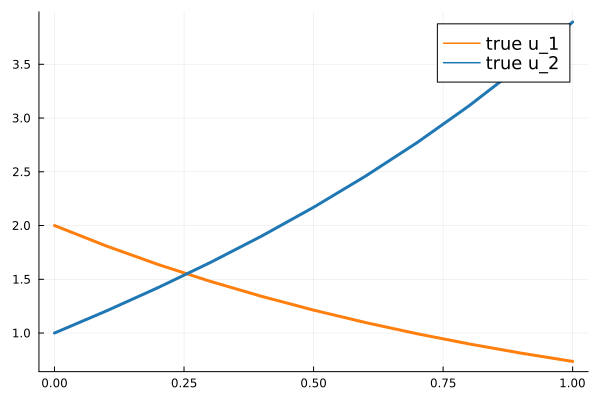

In [12]:
tspan = (0.0f0, 1.0f0)
true_p = [-1.0, 0.0, 0.5, 1.0]
u0 = [2.0, 1.0]
dt = 0.1
prob = ODEProblem(linear_2d_system, u0, tspan, true_p, saveat=dt)
true_sol = solve(prob, Tsit5(), saveat=dt)
plot(true_sol.t, true_sol',
    label = ["true u_1" "true u_2"],
    legend = :topright,
    legendfontsize = 12,
    line=(3, ["#ff7f0e" "#1f77b4"])
)

Now, we take the solution based on these "true" parameters as our data, and see if we can recover the true parameters of our system. For this, we initialise the parameters randomly, and re-create our ODE problem with these parameters. The solution of this new problem will look different: 

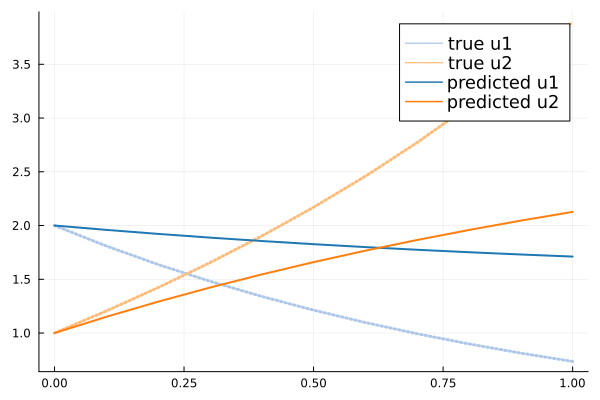

In [17]:
p = randn(4) # new random parameters
pred = solve(ODEProblem(linear_2d_system, u0, tspan, p, saveat=dt), Tsit5(), saveat=dt)
plot(true_sol.t, true_sol',
label = ["true u1" "true u2"],
legend = :topright,
legendfontsize = 12,
line=([:dot :dot], 3, ["#aec7e8" "#ffbb78"])
)
plot!(pred.t, pred'; 
line=(2, ["#1f77b4" "#ff7f0e"]),
label= ["predicted u1" "predicted u2"]
)    

We now want to see whether we can learn the true parameters of the system, by comparing the true solution -- our data -- against the prediction with our current parameters, and use gradient descent to minimise this error. We thus need to define a loss function: 
$\mathrm{loss}(\mathrm{data}, u_0, p) = \frac{1}{n} \sum_i^n \Vert \mathrm{data}_i - \mathrm{ODEsolve}(u_0, p)_i\Vert ^2$

and we try to find the minimum of this function w.r.t $p$, i.e., 
$\min_p \mathrm{loss}(\mathrm{data}, u_0, p)$, essentially by approximating 
$∇_p \mathrm{loss}(\mathrm{data}, u_0, p) = 0$. 

In [14]:
function ODEloss(data, u0, p; dt=0.1)
    prob = ODEProblem(linear_2d_system, u0, tspan, p, saveat=dt)
    cur_sol = solve(prob, Tsit5(), saveat=dt)
    return mean((Array(cur_sol) .- data).^2)
end

ODEloss (generic function with 1 method)

In [16]:
data = Array(true_sol)
ODEloss(data, u0, p)

1.4554287315025072

Now we can optimise our model by using gradient descent on the loss function. For this, we need to obviously calculate the gradients first. This can be done just exactly as above for the simpler function, only that now our function involves an ODE-solving step! But the automatic differentiation framework of `Zygote.jl` can handle that "automatically". 

In [18]:
    ∇loss = gradient(params -> ODEloss(data, u0, params), p)[1]

4-element Vector{Float64}:
  0.3196983841224833
  0.2806133664301817
 -0.765325912288893
 -0.6457048073924331

Now, we can update $p$ by gradient descent: 

In [20]:
η = 0.01
p .-= η.*∇loss

4-element Vector{Float64}:
 -0.2825826448879387
  0.13498467604749997
  1.0060111051859784
 -0.4272398164087115

And look at the loss again: 

In [21]:
ODEloss(data, u0, p)

0.5711389011961918

If we iterate that, we can fit the ODE parameters of our dynamic model to our data: 

┌ Info: initial loss is: 2.134
└ @ Main In[25]:2
┌ Info: Current epoch: 10
└ @ Main In[25]:10
┌ Info: Current loss is:  2.055
└ @ Main In[25]:11


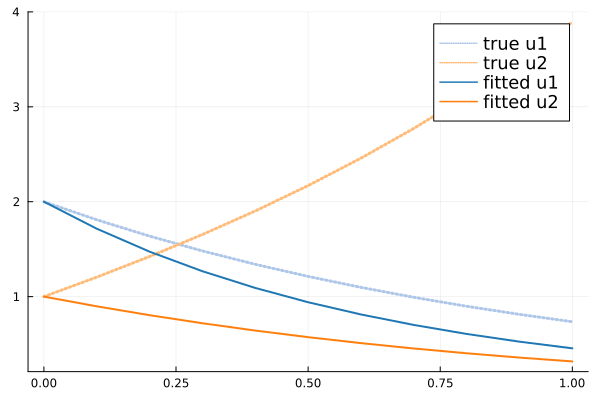

┌ Info: Current epoch: 20
└ @ Main In[25]:10
┌ Info: Current loss is:  1.971
└ @ Main In[25]:11


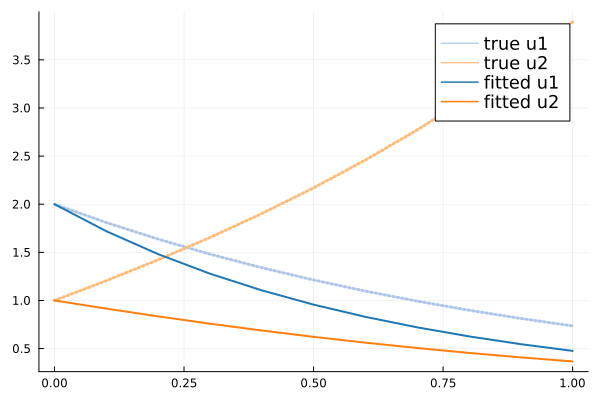

┌ Info: Current epoch: 30
└ @ Main In[25]:10
┌ Info: Current loss is:  1.883
└ @ Main In[25]:11


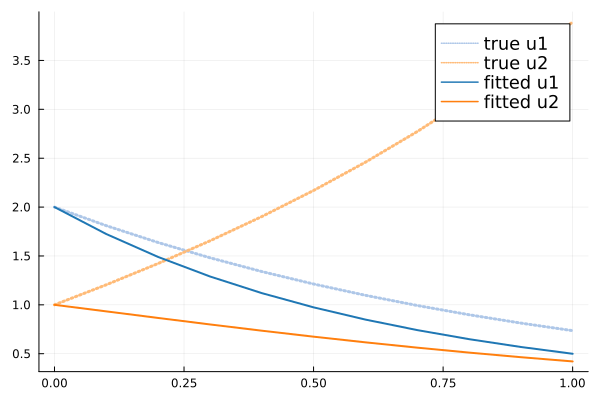

┌ Info: Current epoch: 40
└ @ Main In[25]:10
┌ Info: Current loss is:  1.79
└ @ Main In[25]:11


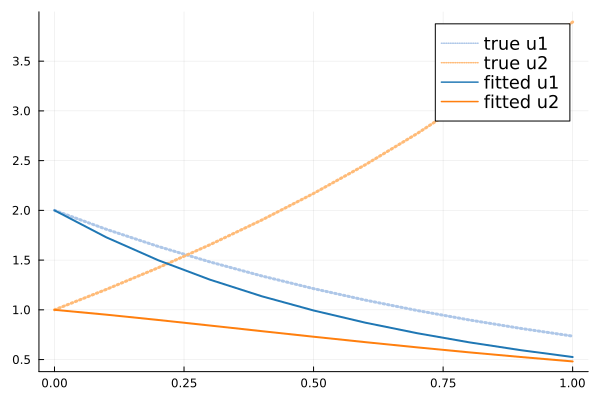

┌ Info: Current epoch: 50
└ @ Main In[25]:10
┌ Info: Current loss is:  1.692
└ @ Main In[25]:11


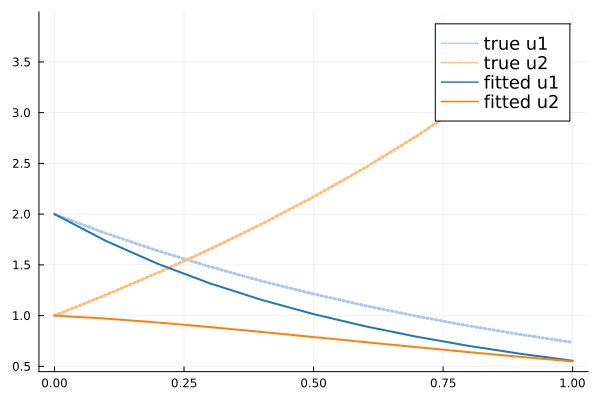

┌ Info: Current epoch: 60
└ @ Main In[25]:10
┌ Info: Current loss is:  1.588
└ @ Main In[25]:11


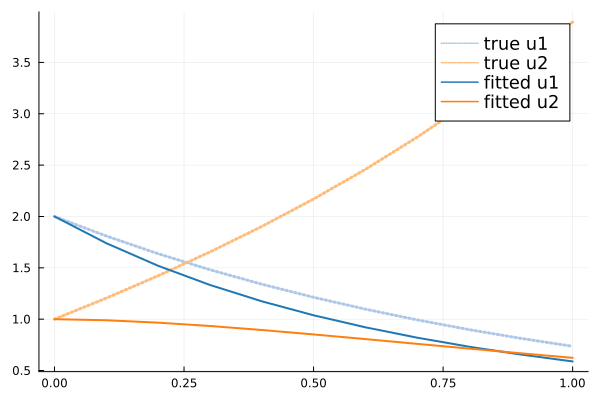

┌ Info: Current epoch: 70
└ @ Main In[25]:10
┌ Info: Current loss is:  1.479
└ @ Main In[25]:11


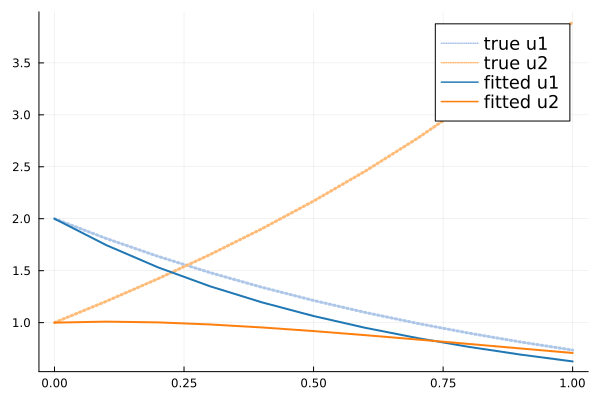

┌ Info: Current epoch: 80
└ @ Main In[25]:10
┌ Info: Current loss is:  1.365
└ @ Main In[25]:11


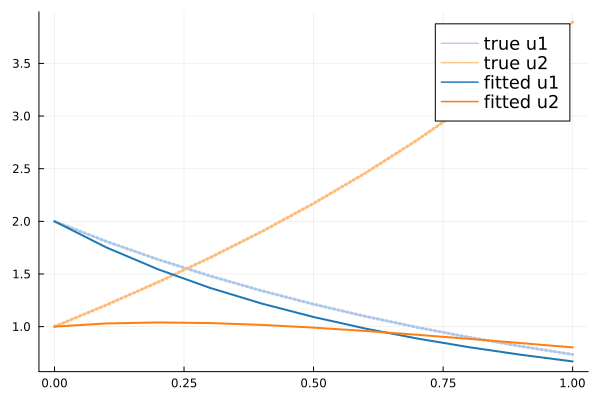

┌ Info: Current epoch: 90
└ @ Main In[25]:10
┌ Info: Current loss is:  1.245
└ @ Main In[25]:11


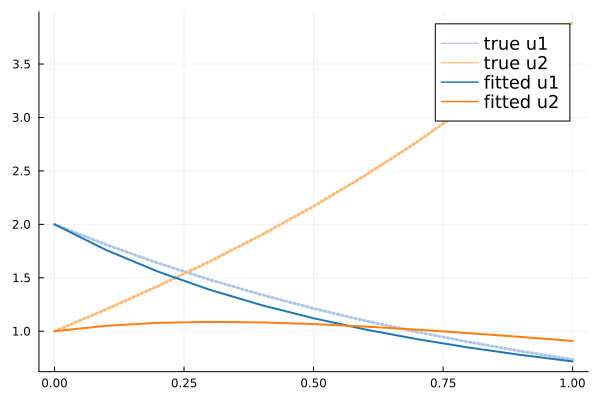

┌ Info: Current epoch: 100
└ @ Main In[25]:10
┌ Info: Current loss is:  1.122
└ @ Main In[25]:11


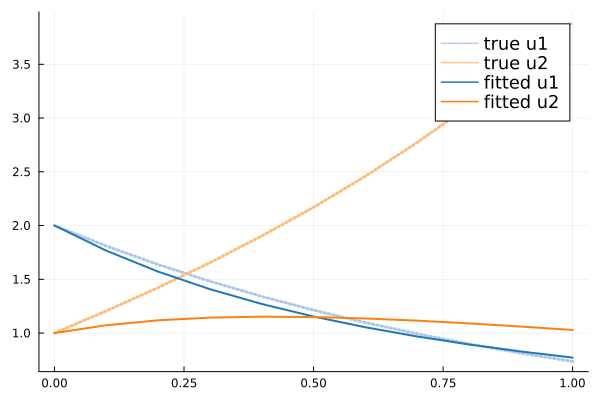

┌ Info: Current epoch: 110
└ @ Main In[25]:10
┌ Info: Current loss is:  0.997
└ @ Main In[25]:11


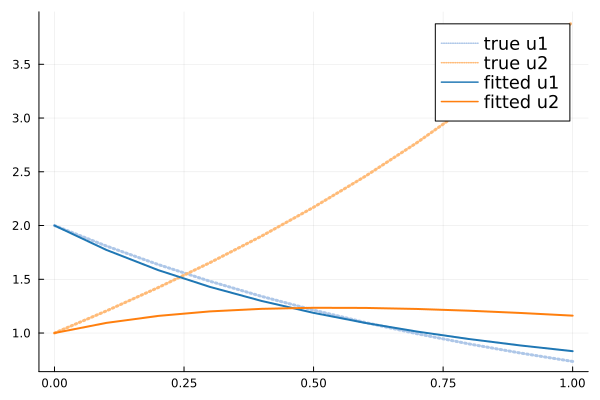

┌ Info: Current epoch: 120
└ @ Main In[25]:10
┌ Info: Current loss is:  0.871
└ @ Main In[25]:11


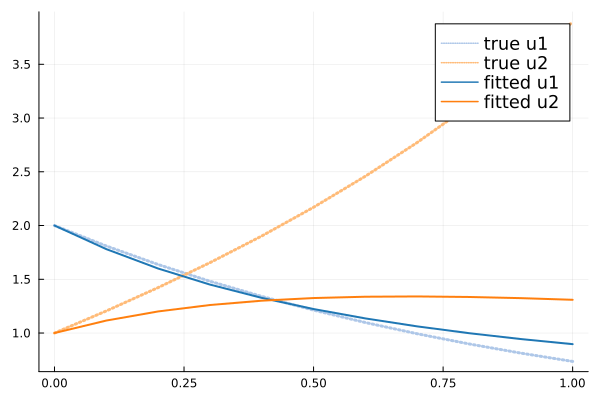

┌ Info: Current epoch: 130
└ @ Main In[25]:10
┌ Info: Current loss is:  0.749
└ @ Main In[25]:11


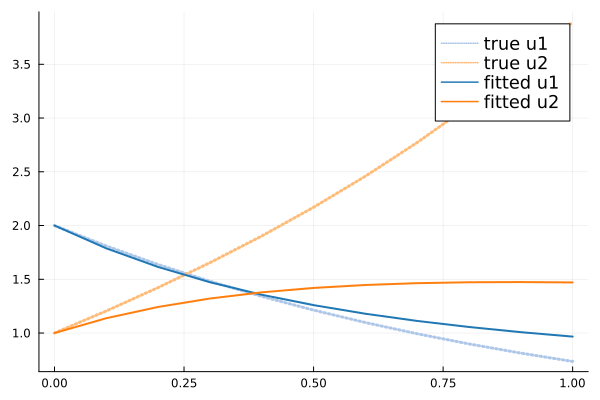

┌ Info: Current epoch: 140
└ @ Main In[25]:10
┌ Info: Current loss is:  0.633
└ @ Main In[25]:11


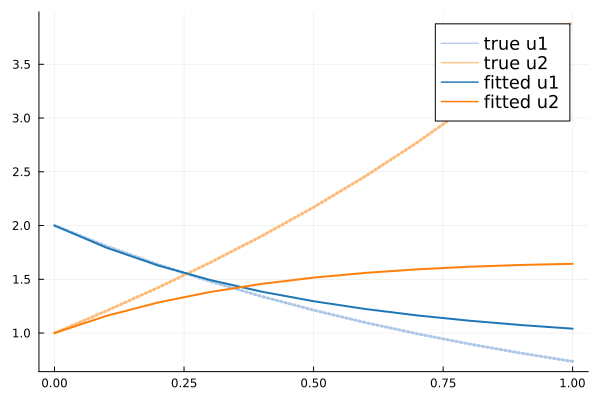

┌ Info: Current epoch: 150
└ @ Main In[25]:10
┌ Info: Current loss is:  0.526
└ @ Main In[25]:11


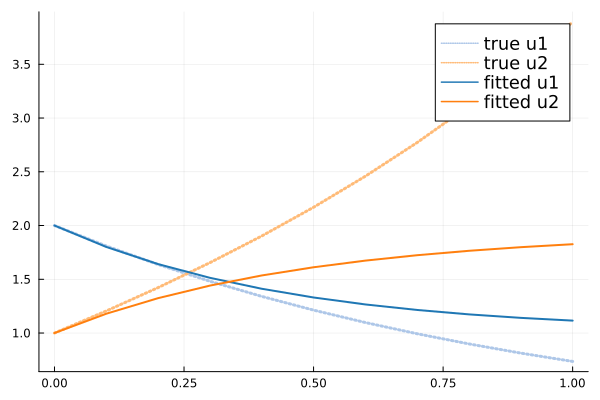

┌ Info: Current epoch: 160
└ @ Main In[25]:10
┌ Info: Current loss is:  0.433
└ @ Main In[25]:11


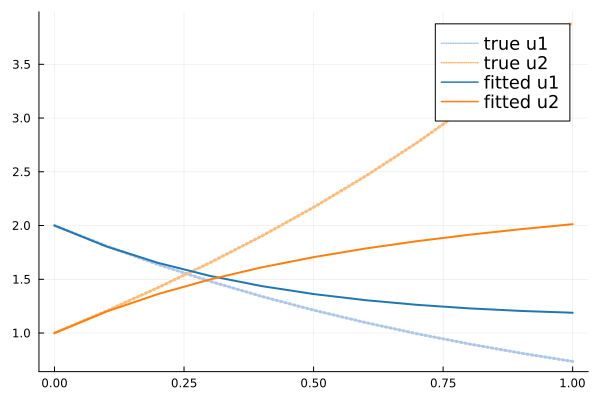

┌ Info: Current epoch: 170
└ @ Main In[25]:10
┌ Info: Current loss is:  0.355
└ @ Main In[25]:11


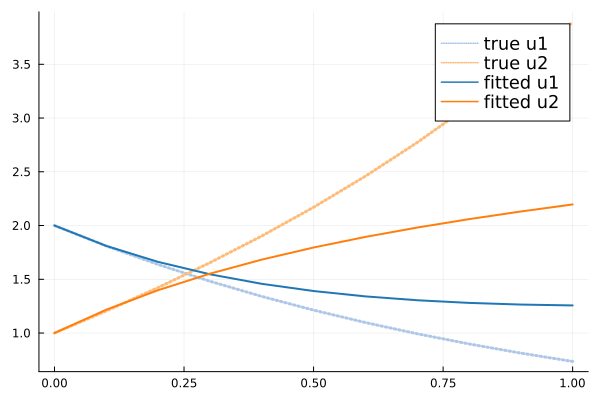

┌ Info: Current epoch: 180
└ @ Main In[25]:10
┌ Info: Current loss is:  0.291
└ @ Main In[25]:11


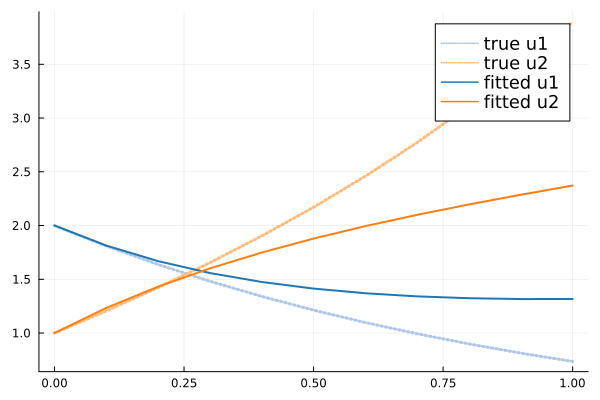

┌ Info: Current epoch: 190
└ @ Main In[25]:10
┌ Info: Current loss is:  0.242
└ @ Main In[25]:11


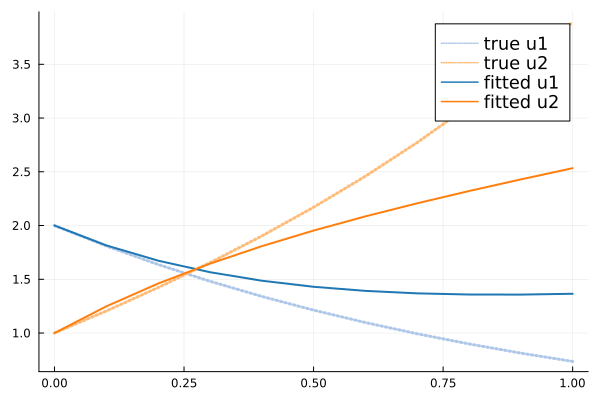

┌ Info: Current epoch: 200
└ @ Main In[25]:10
┌ Info: Current loss is:  0.204
└ @ Main In[25]:11


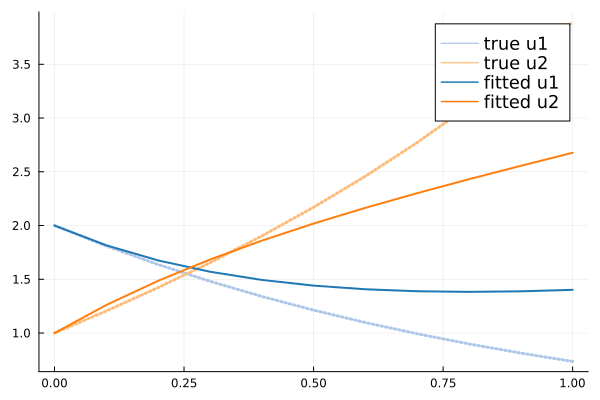

┌ Info: Current epoch: 210
└ @ Main In[25]:10
┌ Info: Current loss is:  0.176
└ @ Main In[25]:11


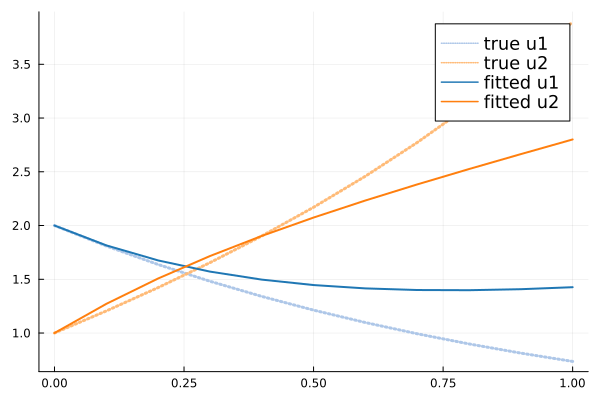

┌ Info: Current epoch: 220
└ @ Main In[25]:10
┌ Info: Current loss is:  0.155
└ @ Main In[25]:11


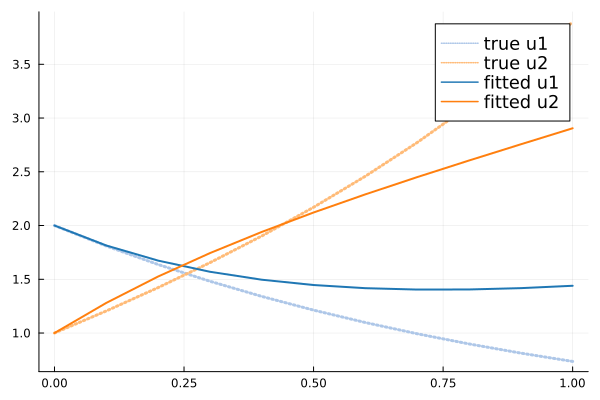

┌ Info: Current epoch: 230
└ @ Main In[25]:10
┌ Info: Current loss is:  0.138
└ @ Main In[25]:11


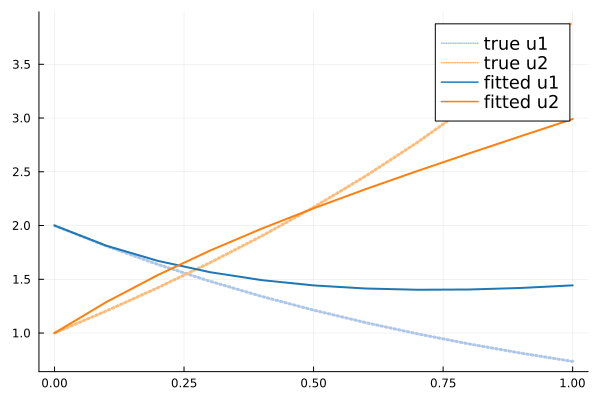

┌ Info: Current epoch: 240
└ @ Main In[25]:10
┌ Info: Current loss is:  0.125
└ @ Main In[25]:11


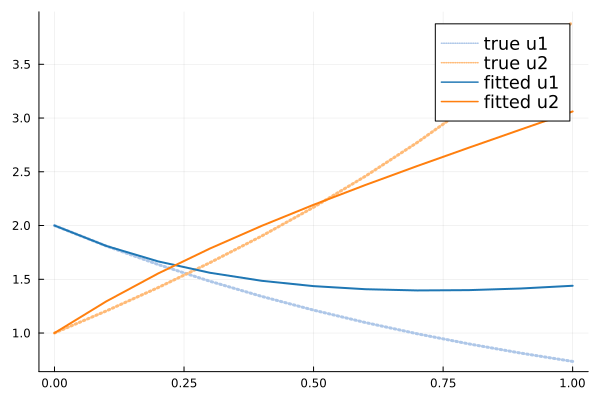

┌ Info: Current epoch: 250
└ @ Main In[25]:10
┌ Info: Current loss is:  0.114
└ @ Main In[25]:11


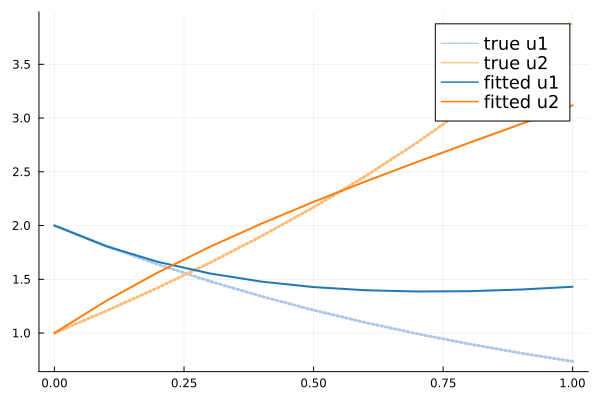

In [25]:
p = randn(4)
@info "initial loss is: $(round(ODEloss(data, u0, p), digits=3))"

η = 0.01
for step in 1:250
    ∇loss = gradient(params -> ODEloss(data, u0, params), p)[1]
    p .-= η.*∇loss
    pred = solve(ODEProblem(linear_2d_system, u0, tspan, p, saveat=dt), Tsit5(), saveat=dt)
    if step % 10 == 0
        @info "Current epoch: $step"
        @info "Current loss is:  $(round(ODEloss(data, u0, p), digits=3))"
        curplot=plot(true_sol.t, true_sol',
            label = ["true u1" "true u2"],
            legend = :topright,
            legendfontsize = 12,
            line=([:dot :dot], 3, ["#aec7e8" "#ffbb78"])
        )
        plot!(pred.t, pred'; 
            line=(2, ["#1f77b4" "#ff7f0e"]),
            label= ["fitted u1" "fitted u2"]
        )
        display(curplot)
    end
end

# Using automatic differentiation to train a neural network

Of course, you can also fit a neural network in Julia. 

┌ Info: epoch 10: current train loss: 0.12336688, current test loss: 0.13331872
└ @ Main In[27]:57
┌ Info: epoch 20: current train loss: 0.038803373, current test loss: 0.058995623
└ @ Main In[27]:57
┌ Info: epoch 30: current train loss: 0.01881101, current test loss: 0.03428286
└ @ Main In[27]:57
┌ Info: epoch 40: current train loss: 0.011041319, current test loss: 0.02376699
└ @ Main In[27]:57
┌ Info: epoch 50: current train loss: 0.0072801285, current test loss: 0.01788615
└ @ Main In[27]:57
┌ Info: epoch 60: current train loss: 0.0051460667, current test loss: 0.013972891
└ @ Main In[27]:57
┌ Info: epoch 70: current train loss: 0.0037492593, current test loss: 0.01117853
└ @ Main In[27]:57
┌ Info: epoch 80: current train loss: 0.0027467052, current test loss: 0.008998438
└ @ Main In[27]:57
┌ Info: epoch 90: current train loss: 0.0020314828, current test loss: 0.0073272996
└ @ Main In[27]:57
┌ Info: epoch 100: current train loss: 0.0015133123, current test loss: 0.006065407
└ @ Main

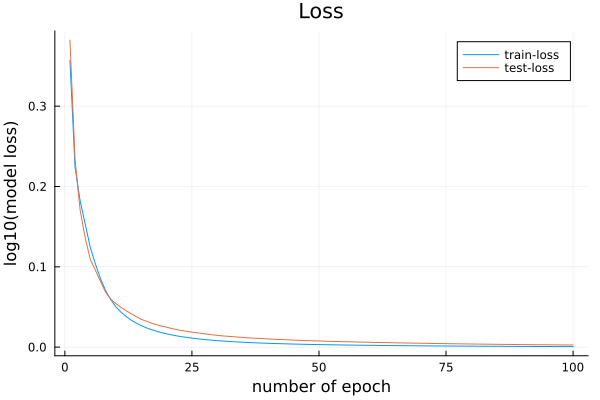

In [27]:
using Flux
using Random

dense_sol = solve(ODEProblem(linear_2d_system, u0, tspan, true_p), Tsit5(), saveat=0.01)
sol_mat = Array(dense_sol)
# split into two components 
# add some random noise
n=100 # dataset size
groups = rand([1,2], n)
dataset = Float32.(cat([sol_mat[i,:] .+ randn(size(sol_mat[i,:])) for i in groups]..., dims=2)')

randindex = shuffle(1:n)
train_inds = randindex[1:Int(floor(n*0.8))]
test_inds = randindex[Int(floor(n*0.8))+1:end]

train_data = dataset[train_inds,:]
test_data = dataset[test_inds,:]

labels = Float32.(groups) .- 1.0f0
train_labels = labels[train_inds]
test_labels = labels[test_inds]

Random.seed!(42)
inputdim = size(train_data,2)
classifier = Chain(
                Dense(inputdim, 10, relu),
                Dense(10, 1)
)

NNloss(m, x, y) = Flux.logitbinarycrossentropy(vec(m(x)), y)

# get the current loss and gradients wrt the model parameters 
ps = Flux.params(classifier)
NNloss(classifier, train_data', train_labels)
grads = Flux.gradient(() -> NNloss(classifier, train_data', train_labels), ps)
grads.grads
length(ps)

# train the model 
η = 0.001
nepochs=100
opt = ADAM(η)
trainingdata = Flux.DataLoader((train_data', train_labels), batchsize=10, shuffle=true)

trainlosses = []
testlosses = []

for epoch in 1:nepochs
    for batch in trainingdata
        grads = Flux.gradient(() -> NNloss(classifier, batch...), ps)
        Flux.Optimise.update!(opt, ps, grads)
    end
    push!(trainlosses, NNloss(classifier, train_data', train_labels))
    push!(testlosses, NNloss(classifier, test_data', test_labels))
    
    if epoch % 10 == 0 # show loss only at 20 timepoints
        @info "epoch $(epoch): current train loss: $(NNloss(classifier, train_data', train_labels)), current test loss: $(NNloss(classifier, test_data', test_labels))"
    end    
end

p1 = plot(collect(1:nepochs), hcat(log.(10, trainlosses .+ 1), log.(10, testlosses .+1 )), title = "Loss", label=["train-loss" "test-loss"], xlabel="number of epoch", ylabel="log10(model loss)", legend=:topright)

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />